In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
%run -i functions.py

Functions Loaded!


In [114]:
av_raw = pd.read_csv("Availability_for_ML.csv")
fa_nov = pd.read_csv("SCS_Alerts_NOV.csv")
fa_oct = pd.read_csv("SCS_Alerts_OCT.csv")

data = pre_process_av_and_fa_oct_nov(av_raw,fa_oct,fa_nov,remove_same_location_faults = True)

fa = data['faults']
av = data['availability']

fa = floor_time(fa,'Entry time',units='H') 

fa = faults_aggregate_and_pivot(df=fa,
                                time_col='Entry time',
                                fault_level='PLC',
                                agg_col='Duration',
                                agg_type='count',#can use mean/count/sum
                                quadrant=None,# by default all quadrants are kept
                                break_durations=False)

fa  = weight_hours(df=fa, weights = [1,0.5,0.25])

av = availability_quadrant_mean(df=av,
                                time_col='Datetime',
                                quadrant=None) # by default all quadrants are kept



df = merge_av_fa(av_df=av,
                 fa_df=fa,
                 min_date=None, 
                 max_date=None) #specify min/max date if you want to filter data by date


#remove columns with only zeros (faults that did not happen in this period of time or quadrant)
df = df.loc[:, (df != 0).any(axis=0)]
df.head()

Quadrants Assigned
duplicated location faults removed - max duration kept
Fault and availability data pre-processed
Dates floored
Faults aggregated and pivoted
Previous Hours Weighted
Availability data aggregated by quadrant
Availability and fault datasets merged


,Datetime,Downtime,C05,C06,C07,C08,C09,C10,C11,C12,...,SCSM11,SCSM12,SCSM13,SCSM14,SCSM15,SCSM17,SCSM18,SCSM19,SCSM20,SCSM22
0,2020-10-16 06:00:00,0.370236,10.25,12.25,9.00,27.50,18.00,2.50,14.50,6.00,...,2.50,8.25,3.0,1.00,7.25,1.50,1.75,0.0,1.50,3.50
1,2020-10-16 07:00:00,0.327088,10.00,8.75,9.75,38.25,24.75,3.00,14.75,4.25,...,19.00,9.50,1.5,0.50,7.50,2.75,1.50,0.0,3.50,5.25
2,2020-10-16 08:00:00,0.234701,11.75,15.50,9.00,48.75,22.50,5.25,16.25,12.75,...,10.00,22.50,0.5,0.25,5.75,1.25,3.50,6.0,2.75,5.50
3,2020-10-16 09:00:00,0.168205,22.50,20.00,10.00,36.75,21.75,5.50,15.25,19.00,...,10.00,14.00,1.0,1.00,5.00,3.50,4.75,5.0,3.25,9.50
4,2020-10-16 10:00:00,0.231875,22.50,19.50,17.25,26.25,23.75,5.50,17.50,27.25,...,6.75,20.25,0.5,0.50,2.00,3.50,7.25,2.5,1.25,6.25


Feature Importance Ranking: 
 
    Importance Feature
0    0.151239     C14
1    0.087106     C09
2    0.061191     C17
3    0.060663  SCSM12
4    0.059161  SCSM11
5    0.049837     C08
6    0.039327  SCSM01
7    0.037039  SCSM04
8    0.036924  SCSM02
9    0.029048     C06

Number of Selected Features:10

Regression Metrics: 
 
                  RF  RF Reduced
MAE        0.096982    0.086336
MSE        0.014066    0.011862
RMSE       0.118602    0.108914
MAPE%     29.620000   26.930000
ACC%      70.380000   73.070000
OOB        0.373195    0.391218
R2_Train   0.914716    0.917096
R2_Pred    0.460899    0.445229

Cross Validation Scores: 
 
       RF R2 Scores  RF Reduced R2 Scores
1         0.323294              0.378829
2         0.391181              0.351419
3         0.209101              0.144970
4         0.185459              0.102159
5         0.207205              0.235455
Mean      0.263248              0.242566
STD       0.080120              0.109276


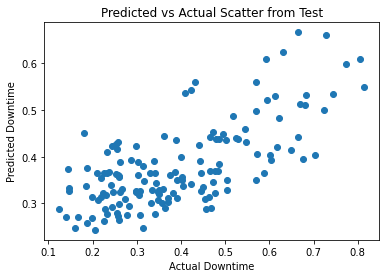

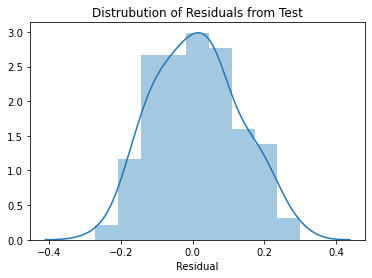

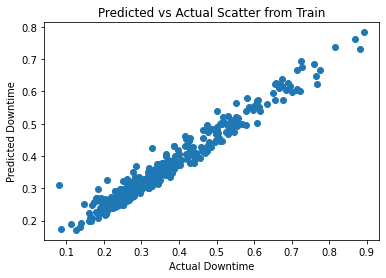

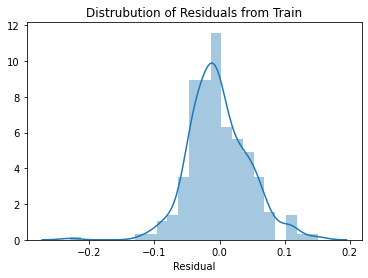

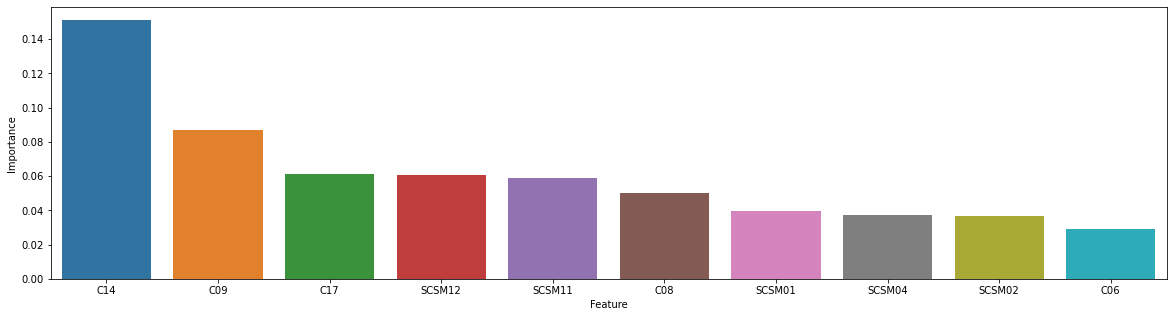

In [113]:
run_model(df, modeltype='RF',num_trees=100,cv=5,select = 'mean',dtree=False)